#  Recycler Simulation

In [50]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

import copy

from scipy.constants import c, e, m_p

import PyHEADTAIL

from FERMImachines import RR

In [51]:
Q_x = 25.4601
Q_y = 24.412

In [52]:
machine = RR(n_segments=1, machine_configuration='53MHz', 
             longitudinal_focusing='non-linear')

epsn_x = epsn_y = 2.5e-6 # in [m rad]

bunch = machine.generate_6D_Gaussian_bunch_matched(
    n_macroparticles=int(1e3), intensity=1e11, 
    epsn_x=epsn_x, epsn_y=epsn_y, sigma_z=0.2)

Synchrotron init. From kwargs: n_segments = 1
Synchrotron init. From kwargs: machine_configuration = '53MHz'
Synchrotron init. From kwargs: longitudinal_focusing = 'non-linear'
*** Maximum RMS bunch length 0.889766948349279m.


... distance to target bunch length: -1.9516e-01
... distance to target bunch length: 6.6519e-01
... distance to target bunch length: 2.3116e-01
... distance to target bunch length: -1.1321e-02
... distance to target bunch length: -8.3438e-05
... distance to target bunch length: -7.9837e-08
... distance to target bunch length: 9.4652e-07
--> Bunch length: 0.19999992016304485
--> Emittance: 0.00875092415125835


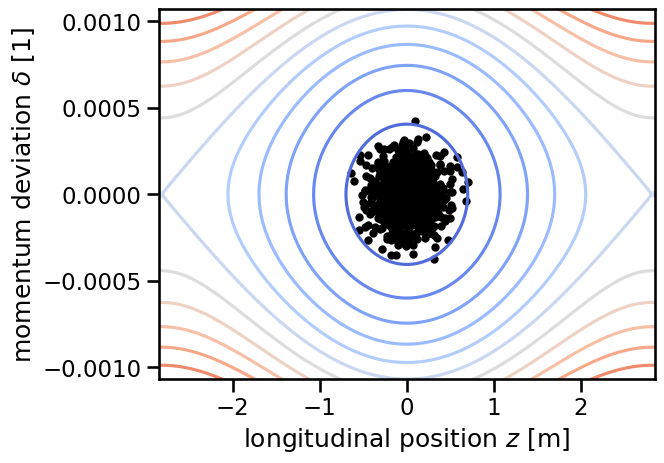

In [53]:
rfsystems = machine.longitudinal_map
rfbucket = rfsystems.get_bucket(bunch)

zz = np.linspace(*rfbucket.interval, num=1000)
dp_max = rfbucket.separatrix(0)
dpp = np.linspace(-dp_max*1.1, dp_max*1.1, num=100)
ZZ, DPP = np.meshgrid(zz, dpp)
HH = rfbucket.hamiltonian(ZZ, DPP)

plt.scatter(bunch.z, bunch.dp, marker='.', color='black')
plt.contour(ZZ, DPP, HH, 15, cmap=plt.get_cmap('coolwarm'))
plt.xlim(rfbucket.interval)
plt.ylim(-dp_max, dp_max)
plt.xlabel('longitudinal position $z$ [m]')
plt.ylabel('momentum deviation $\delta$ [1]');

In [54]:
machine.one_turn_map

In [55]:
n_turns = 512

x_rec = np.empty((n_turns, bunch.macroparticlenumber), dtype=np.float64)
y_rec = np.empty((n_turns, bunch.macroparticlenumber), dtype=np.float64)

In [56]:
for i in range(n_turns):
    for m in machine.transverse_map:
        x_rec[i, :] = bunch.x
        y_rec[i, :] = bunch.y
        m.track(bunch)

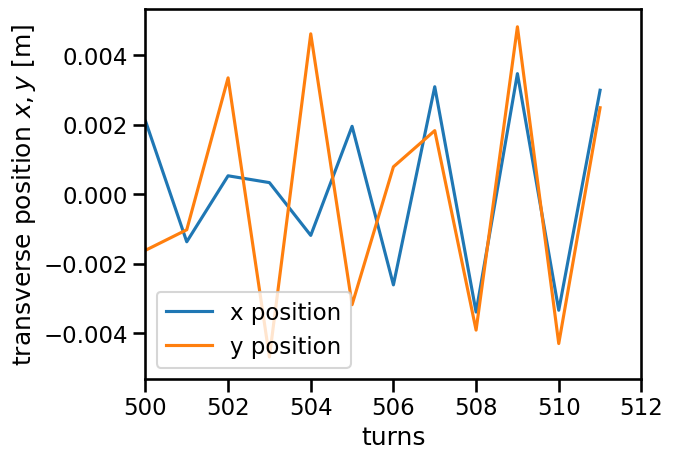

In [57]:
plt.plot(x_rec[:, 0], label='x position')
plt.plot(y_rec[:, 0], label='y position')
plt.legend()
plt.xlim(500, 512)
plt.xlabel('turns')
plt.ylabel('transverse position $x,y$ [m]');

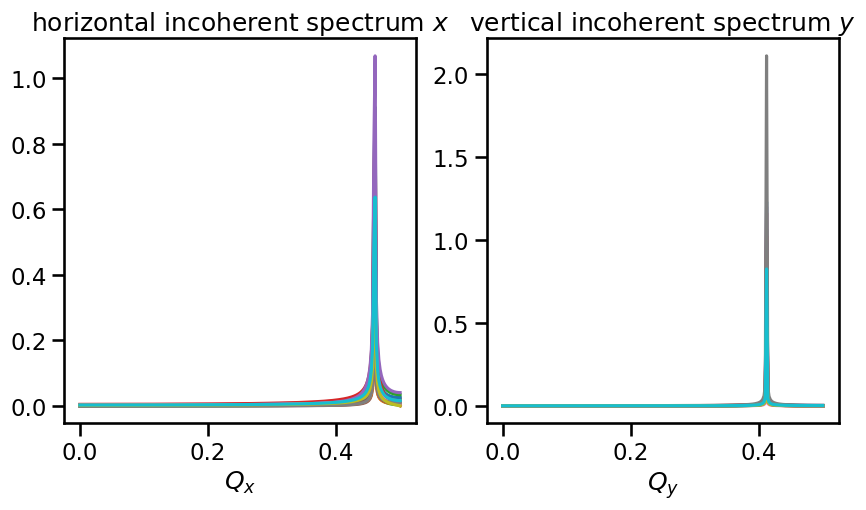

In [58]:
freqs = np.fft.rfftfreq(n_turns)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for x, y in zip(x_rec.T[:20], y_rec.T[:20]):
    ax[0].plot(freqs, np.abs(np.fft.rfft(x)))
    ax[1].plot(freqs, np.abs(np.fft.rfft(y)))
ax[0].set_title('horizontal incoherent spectrum $x$')
ax[0].set_xlabel('$Q_x$')
ax[1].set_title('vertical incoherent spectrum $y$')
ax[1].set_xlabel('$Q_y$');

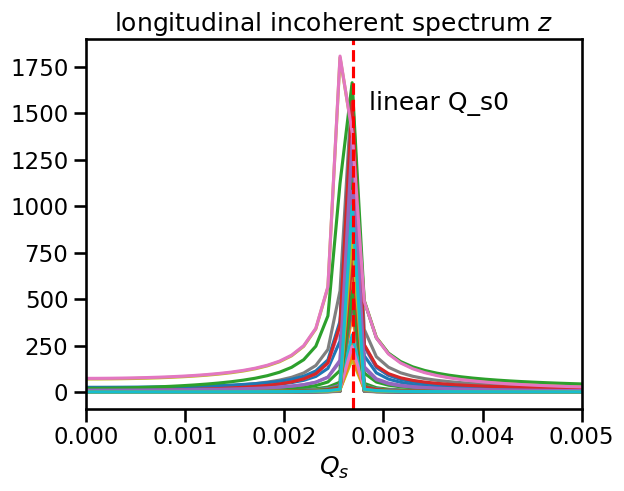

In [59]:
n_turns = 8192

z_rec = np.empty((n_turns, bunch.macroparticlenumber), dtype=np.float64)

for i in range(n_turns):
    z_rec[i, :] = bunch.z
    machine.track(bunch)

freqs = np.fft.rfftfreq(n_turns)
for z in z_rec.T[:50]:
    plt.plot(freqs, np.abs(np.fft.rfft(z)))
plt.xlim(0, 0.005);
plt.title('longitudinal incoherent spectrum $z$')
plt.axvline(rfbucket.Q_s, color='red', ls='--')
plt.text(rfbucket.Q_s, plt.ylim()[1]*0.8, '  linear Q_s0')
plt.xlabel('$Q_s$');

In [88]:
Qp_x = [-0.83 * Q_x] # linear horizontal chromaticity, in tune units
Qp_y = [-1.12 * Q_y] # linear vertical chromaticity, in tune units

machine = RR(n_segments=1, machine_configuration='53MHz', 
             longitudinal_focusing='non-linear', Q_x=Q_x, Q_y=Q_y, 
             # chromaticity enters here:
             Qp_x=Qp_x, Qp_y=Qp_y)

Synchrotron init. From kwargs: n_segments = 1
Synchrotron init. From kwargs: machine_configuration = '53MHz'
Synchrotron init. From kwargs: longitudinal_focusing = 'non-linear'
Synchrotron init. From kwargs: Q_x = 25.4601
Synchrotron init. From kwargs: Q_y = 24.412
Synchrotron init. From kwargs: Qp_x = [-21.131883]
Synchrotron init. From kwargs: Qp_y = [-27.341440000000002]


In [89]:
epsn_x = epsn_y = 2.5e-6 # in [m rad]

bunch = machine.generate_6D_Gaussian_bunch_matched(
    n_macroparticles=int(1e3), intensity=1e11, 
    epsn_x=epsn_x, epsn_y=epsn_y, sigma_z=0.2)

*** Maximum RMS bunch length 0.889766948349279m.
... distance to target bunch length: -1.9516e-01
... distance to target bunch length: 6.6519e-01
... distance to target bunch length: 2.3116e-01
... distance to target bunch length: -1.1321e-02
... distance to target bunch length: -8.3438e-05
... distance to target bunch length: -7.9837e-08
... distance to target bunch length: 9.4652e-07
--> Bunch length: 0.19999992016304485
--> Emittance: 0.00875092415125835


In [90]:
n_turns = 512

x_rec = np.empty((n_turns, bunch.macroparticlenumber), dtype=np.float64)
y_rec = np.empty((n_turns, bunch.macroparticlenumber), dtype=np.float64)

for i in range(n_turns):
    x_rec[i, :] = bunch.x
    y_rec[i, :] = bunch.y
    machine.track(bunch)

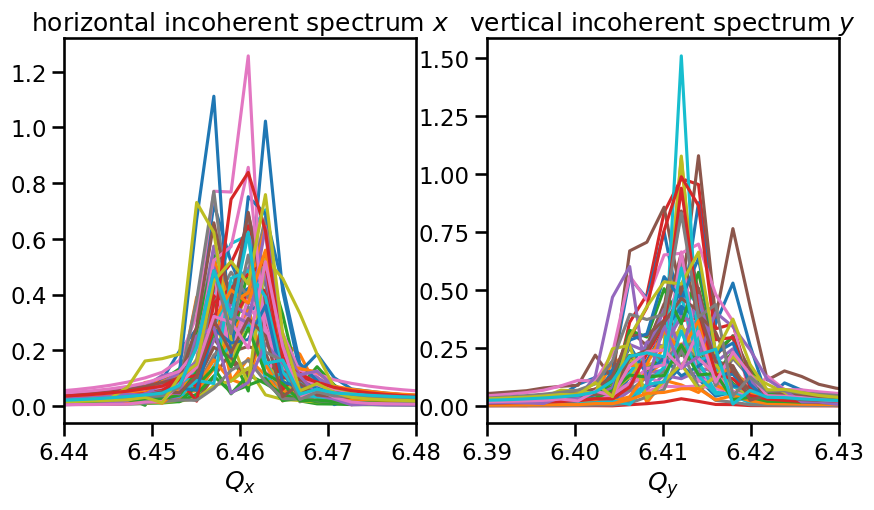

In [92]:
freqs = 6 + np.fft.rfftfreq(n_turns)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for x, y in zip(x_rec.T[:50], y_rec.T[:50]):
    ax[0].plot(freqs, np.abs(np.fft.rfft(x)))
    ax[1].plot(freqs, np.abs(np.fft.rfft(y)))
ax[0].set_title('horizontal incoherent spectrum $x$')
ax[0].set_xlabel('$Q_x$')
ax[0].set_xlim(6.44, 6.48)
ax[1].set_title('vertical incoherent spectrum $y$')
ax[1].set_xlabel('$Q_y$')
ax[1].set_xlim(6.39, 6.43);